# Logistic Regressions And Decision Trees 

#### Imports 

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn import tree

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

#### Helper functions for checking model performance

In [4]:
# returns labelled model coefficient 
def model_coefficients(clf, features, clf_name = 'clf'):
    model_coeff = pd.DataFrame(clf.coef_,columns=features, index = [clf_name])
    model_coeff['intercept'] = clf.intercept_
    return model_coeff

In [5]:
def model_metrics(clf, X_train, y_train, X_test, y_test, clf_name = 'clf'):
    result = pd.DataFrame({'train_accuracy': metrics.accuracy_score(y_train, clf.predict(X_train)), 
                           'train_precision': metrics.precision_score(y_train, clf.predict(X_train)), 
                           'train_recall': metrics.recall_score(y_train, clf.predict(X_train)),
                           'train_f1': metrics.f1_score(y_train, clf.predict(X_train)),
                           'test_accuracy': metrics.accuracy_score(y_test, clf.predict(X_test)), 
                           'test_precision': metrics.precision_score(y_test, clf.predict(X_test)), 
                           'test_recall': metrics.recall_score(y_test, clf.predict(X_test)),
                           'test_f1': metrics.f1_score(y_test, clf.predict(X_test))},
                          index = [clf_name])
    return result                                                                   

#### Read in data and prepare training and testing sets

In [6]:
data = pd.read_csv('acceleration_jerk_summary_statistics.csv', index_col=0)
data.head()

,activity,type,acc_avg,x_avg,y_avg,z_avg,acc_std,x_std,y_std,z_std,...,jerk_z_std,jerk_max,jerk_x_max,jerk_y_max,jerk_z_max,jerk_min,jerk_x_min,jerk_y_min,jerk_z_min,fall
test_id,,,,,,,,,,,,,,,,,,,,,
0,standing_up,ADL,9.552443,3.266730,5.630226,-4.807679,2.342120,4.158268,2.813486,2.560926,...,1.479079,6.950750,8.054477,5.309909,6.570453,-13.568339,-5.124949,-10.748145,-6.744196,0
1,standing_up,ADL,9.521244,3.629327,5.541744,-3.880594,2.291613,3.691587,4.339937,2.266056,...,0.889184,6.062499,2.144653,4.978083,2.619034,-6.738159,-1.957341,-6.749622,-2.905810,0
2,standing_up,ADL,9.608439,3.362532,5.861408,-4.778487,2.192242,4.061633,2.881601,2.075421,...,1.368305,10.301682,7.597698,8.046484,6.683351,-7.908932,-8.792149,-7.475692,-4.816930,0
3,standing_up,ADL,9.575243,2.995170,5.629874,-5.482137,1.485730,3.749535,2.363551,1.986514,...,0.785317,5.382611,4.066377,4.291689,2.777493,-6.323330,-1.232509,-6.390728,-3.226949,0
4,standing_up,ADL,9.548623,-2.296404,4.875306,-6.402479,2.018807,3.859272,1.854574,2.703216,...,1.841952,6.867238,1.965192,3.429155,10.635332,-9.242627,-3.454178,-3.480220,-5.986656,0


In [7]:
# using magnitude features
features_magn = ['acc_avg','acc_std','acc_min', 'acc_max', 'jerk_avg','jerk_std','jerk_min', 'jerk_max']
#Split data into training and test sets.
X_train_magn, X_test_magn, y_train_magn, y_test_magn = train_test_split(data[features_magn], data['fall'], 
                                                                        random_state = 42, test_size = 0.4)

In [8]:
# using 3 dim features 
features_3d = ['x_avg', 'x_std', 'x_min', 'x_max','jerk_x_avg','jerk_x_std','jerk_x_min','jerk_x_max', 
           'y_avg', 'y_std', 'y_min', 'y_max','jerk_y_avg','jerk_y_std','jerk_y_min','jerk_y_max',
            'z_avg', 'z_std', 'z_min', 'z_max','jerk_z_avg','jerk_z_std','jerk_z_min','jerk_z_max']
# Split data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(data[features_3d], data['fall'], 
                                                                random_state = 42, test_size = 0.4)

---------------
## Logistic Regressions

In [9]:
# regularisation params
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

### Logistic regression using Magnitude features: L1 and L2 penalty

#### Try L1 and L2 separately to see feature selection 

In [10]:
# fit logistic regressions with L1 penalty
lr_magn_L1 = LogisticRegressionCV(Cs=Cs,penalty='l1',solver = 'liblinear',cv = 5) 
lr_magn_L1.fit(X_train_magn, y_train_magn)
print "Model L1:", lr_magn_L1
print 'Model L1: Best C:', lr_magn_L1.C_

Model L1: LogisticRegressionCV(Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l1', random_state=None, refit=True,
           scoring=None, solver='liblinear', tol=0.0001, verbose=0)
Model L1: Best C: [ 10000.]


In [11]:
# fit logistic regressions with L2 penalty
lr_magn_L2 = LogisticRegressionCV(Cs=Cs,penalty='l2',solver = 'liblinear',cv = 5) 
lr_magn_L2.fit(X_train_magn, y_train_magn)
print "Model L2:", lr_magn_L2
print 'Model L2: Best C:', lr_magn_L2.C_

Model L2: LogisticRegressionCV(Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='liblinear', tol=0.0001, verbose=0)
Model L2: Best C: [ 10.]


In [12]:
# Model Coefficients
pd.concat([model_coefficients(lr_magn_L1, features_magn, 'L1'),model_coefficients(lr_magn_L2, features_magn, 'L2')]) 

,acc_avg,acc_std,acc_min,acc_max,jerk_avg,jerk_std,jerk_min,jerk_max,intercept
L1,-0.106049,0.062463,0.228631,0.480735,2.041500,-1.401309,-0.220717,0.135633,-11.119961
L2,-0.137463,0.058873,0.222853,0.474521,2.045413,-1.360607,-0.217497,0.130500,-10.663053


In [13]:
# Model performance
mm1 = pd.concat([model_metrics(lr_magn_L1, X_train_magn, y_train_magn, X_test_magn, y_test_magn,'LogRegr_Magn_L1'), 
           model_metrics(lr_magn_L2, X_train_magn, y_train_magn, X_test_magn, y_test_magn, 'LogRegr_Magn_L2')])
mm1

,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall
LogRegr_Magn_L1,0.858161,0.678514,0.763636,0.610465,0.871405,0.702584,0.790842,0.632047
LogRegr_Magn_L2,0.859230,0.679643,0.768807,0.609012,0.872356,0.704458,0.794045,0.633037


In [14]:
# get cross validation accuracy scores
cv_scores_L1 = pd.DataFrame(lr_magn_L1.scores_[1], columns = lr_magn_L1.Cs_).T
cv_scores_L1['mean'] = cv_scores_L1.mean(axis = 1)
cv_scores_L2 = pd.DataFrame(lr_magn_L2.scores_[1], columns = lr_magn_L2.Cs_).T
cv_scores_L2['mean'] = cv_scores_L2.mean(axis = 1)

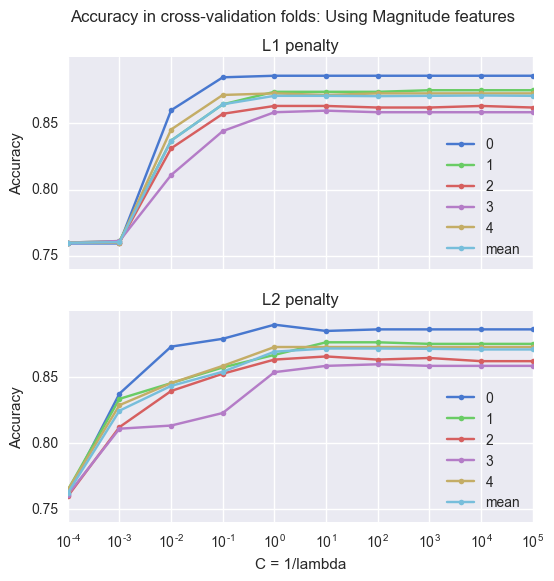

In [15]:
# plot accuracy rate
sns.set(style='darkgrid', palette='muted')
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize = (6,6))
cv_scores_L1.plot(title = "L1 penalty", logx=True,ax = ax1, marker = 'o', ms = 4)
cv_scores_L2.plot(title = "L2 penalty", logx=True,ax = ax2, marker = 'o', ms = 4)
ax2.set_xlabel('C = 1/lambda')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Accuracy')
fig.suptitle("Accuracy in cross-validation folds: Using Magnitude features")

#### Use Cross validation for choosing between L1 an L2 and for regularisation parameter

In [16]:
param_grid = {'C': Cs, 'penalty':['l1','l2'] }
lr_magn = GridSearchCV(LogisticRegression(), param_grid, cv = 5 )
lr_magn.fit(X_train_magn, y_train_magn)
print 'Best Params', lr_magn.best_params_

Best Params {'penalty': 'l2', 'C': 10}


In [17]:
mm2 = model_metrics(lr_magn, X_train_magn, y_train_magn, X_test_magn, y_test_magn, 'LogRegr: 8 features')
mm2

,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall
LogRegr: 8 features,0.85923,0.679643,0.768807,0.609012,0.872356,0.704458,0.794045,0.633037


In [18]:
lr_magn.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Logistic regression using three dimensional features:  L1 and L2 penalty

#### Try L1 and L2 separately to see feature selection 

In [19]:
# fit logistic regressions with L1 and L2 penalties 
lr_L1 = LogisticRegressionCV(Cs=Cs,penalty='l1',solver = 'liblinear',cv = 5) 
lr_L1.fit(X_train, y_train)
lr_L2 = LogisticRegressionCV(Cs=Cs,penalty='l2',solver = 'liblinear',cv = 5) 
lr_L2.fit(X_train, y_train)
print "Model L1:", lr_L1
print 'Model L1: Best C:', lr_L1.C_
print "Model L2:", lr_L2
print 'Model L2: Best C:', lr_L2.C_

Model L1: LogisticRegressionCV(Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l1', random_state=None, refit=True,
           scoring=None, solver='liblinear', tol=0.0001, verbose=0)
Model L1: Best C: [ 1.]
Model L2: LogisticRegressionCV(Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='liblinear', tol=0.0001, verbose=0)
Model L2: Best C: [ 1.]


In [20]:
# Model performance
metrics_LR = pd.concat([model_metrics(lr_L1, X_train, y_train, X_test, y_test, 'LogRegr_L1'), 
                       model_metrics(lr_L2, X_train, y_train, X_test, y_test, 'LogRegr_L2')])
metrics_LR

,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall
LogRegr_L1,0.942623,0.877752,0.918919,0.840116,0.954837,0.902464,0.938100,0.869436
LogRegr_L2,0.941910,0.875667,0.921348,0.834302,0.953649,0.899640,0.937768,0.864491


In [21]:
# Model Coefficients
pd.concat([model_coefficients(lr_L1, features_3d, 'L1'),model_coefficients(lr_L2, features_3d, 'L2')]) 

,x_avg,x_std,x_min,x_max,jerk_x_avg,jerk_x_std,jerk_x_min,jerk_x_max,y_avg,y_std,...,jerk_y_max,z_avg,z_std,z_min,z_max,jerk_z_avg,jerk_z_std,jerk_z_min,jerk_z_max,intercept
L1,-0.123498,0.348156,-0.127192,0.196152,0.000000,-1.651406,-0.210321,0.264481,0.158067,-0.972243,...,0.244774,0.169781,1.541861,0.038586,-0.094253,-1.825059,-1.086107,-0.119628,0.101853,-8.832092
L2,-0.109424,0.346393,-0.117745,0.178257,-0.087283,-1.620076,-0.206863,0.263479,0.156630,-0.932808,...,0.232106,0.169281,1.467664,0.042309,-0.100389,-1.364445,-0.993957,-0.115452,0.095925,-8.086258


In [22]:
# get cross validation accuracy scores
cv_scores_L1 = pd.DataFrame(lr_L1.scores_[1], columns = lr_L1.Cs_).T
cv_scores_L1['mean'] = cv_scores_L1.mean(axis = 1)
cv_scores_L2 = pd.DataFrame(lr_L2.scores_[1], columns = lr_L2.Cs_).T
cv_scores_L2['mean'] = cv_scores_L2.mean(axis = 1)

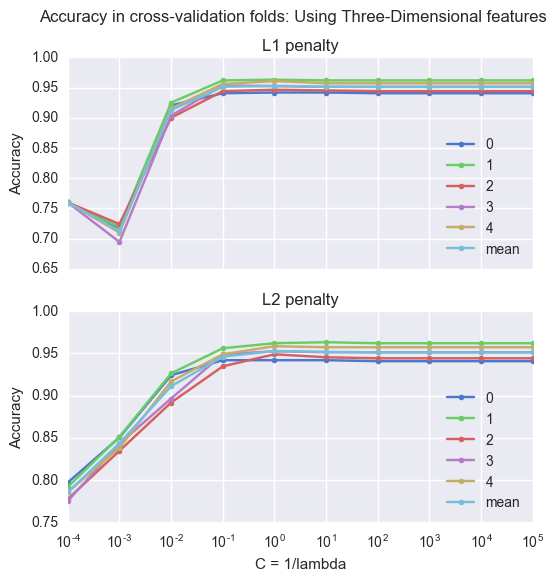

In [23]:
# plot accuracy rate
sns.set(style='darkgrid', palette='muted')
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize = (6,6))
cv_scores_L1.plot(title = "L1 penalty", logx=True,ax = ax1, marker = 'o', ms = 4)
cv_scores_L2.plot(title = "L2 penalty", logx=True,ax = ax2, marker = 'o', ms = 4)
ax2.set_xlabel('C = 1/lambda')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Accuracy')
fig.suptitle("Accuracy in cross-validation folds: Using Three-Dimensional features")

#### Use Cross validation for choosing between L1 an L2 and for regularisation parameter

In [24]:
param_grid = {'C': Cs, 'penalty':['l1','l2'] }
clf1 = GridSearchCV(LogisticRegression(), param_grid, cv = 5 )
clf1.fit(X_train, y_train)
print 'Best Params', clf1.best_params_

Best Params {'penalty': 'l1', 'C': 1}


In [25]:
mm3 = model_metrics(clf1, X_train, y_train, X_test, y_test, 'LogRegr: 24 features')
mm3

,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall
LogRegr: 24 features,0.942623,0.877752,0.918919,0.840116,0.954837,0.902464,0.9381,0.869436


In [26]:
clf1.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

--------
## Decision Trees

### Decision tree: using magnitude features

In [27]:
clf_tree_magn = tree.DecisionTreeClassifier()
clf_tree_magn.fit(X_train_magn, y_train_magn)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [28]:
mm4 = model_metrics(clf_tree_magn, X_train_magn, y_train_magn, X_test_magn, y_test_magn, 'Tree: 8 features')
mm4

,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall
Tree: 8 features,0.857092,0.70493,0.71386,0.696221,1.0,1.0,1.0,1.0


In [29]:
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(clf_tree_magn, out_file=f)

In [30]:
from IPython.display import IFrame
IFrame("tree.pdf", width=800, height=500,)

In [31]:
# feature importance
feature_importance = pd.DataFrame(clf_tree_magn.feature_importances_, index = features_magn, columns = ['importance'])
feature_importance.sort_values('importance', ascending=False).T

,acc_max,acc_std,jerk_avg,acc_min,acc_avg,jerk_std,jerk_min,jerk_max
importance,0.437533,0.125059,0.1079,0.090362,0.075301,0.067711,0.052046,0.044087


Q: How can i measure complexity of the tree??

### Decision tree using 3 dimensional features

In [32]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [33]:
mm5 = model_metrics(clf_tree, X_train, y_train, X_test, y_test, 'Tree: 24 features')
mm5

,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall
Tree: 24 features,0.943336,0.884195,0.886131,0.882267,1.0,1.0,1.0,1.0


In [34]:
# feature importance
feature_importance = pd.DataFrame(clf_tree.feature_importances_, index = features_3d, columns = ['importance'])
feature_importance.sort_values('importance', ascending=False).T

,z_std,y_avg,x_std,x_avg,z_min,y_min,x_max,y_std,jerk_x_min,x_min,...,jerk_y_min,jerk_y_std,jerk_z_avg,jerk_z_max,jerk_x_avg,jerk_y_avg,jerk_x_max,jerk_z_std,jerk_z_min,jerk_x_std
importance,0.511803,0.188535,0.060369,0.036248,0.026113,0.024844,0.020739,0.017578,0.015343,0.013433,...,0.007422,0.006986,0.00578,0.005499,0.005301,0.004295,0.003575,0.003024,0.001609,0.0


----------------------
## Results so far 

In [35]:
pd.concat([mm2,mm3,mm4,mm5])

,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall
LogRegr: 8 features,0.859230,0.679643,0.768807,0.609012,0.872356,0.704458,0.794045,0.633037
LogRegr: 24 features,0.942623,0.877752,0.918919,0.840116,0.954837,0.902464,0.938100,0.869436
Tree: 8 features,0.857092,0.704930,0.713860,0.696221,1.000000,1.000000,1.000000,1.000000
Tree: 24 features,0.943336,0.884195,0.886131,0.882267,1.000000,1.000000,1.000000,1.000000
